In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Utilities import *

In [2]:
df = pd.read_hdf("/storage/shared/data/2lep_df_forML_bkg_signal_fromRDF.hdf5")
df_data = pd.read_hdf("/storage/shared/data/2lep_df_forML_data_fromRDF.hdf5")
print(df.keys())

Index(['njet20', 'njet60', 'nbjet60', 'nbjet70', 'nbjet77', 'nbjet85', 'isOS',
       'isSF', 'mll', 'mt2', 'met_et', 'met_phi', 'lep1_flav', 'lep1_pt',
       'lep1_eta', 'lep1_phi', 'lep1_E', 'lep1_ptcone30', 'lep1_etcone20',
       'lep1_trackd0pvunbiased', 'lep1_tracksigd0pvunbiased', 'lep1_isTightID',
       'lep1_z0', 'lep2_flav', 'lep2_pt', 'lep2_eta', 'lep2_phi', 'lep2_E',
       'lep2_ptcone30', 'lep2_etcone20', 'lep2_trackd0pvunbiased',
       'lep2_tracksigd0pvunbiased', 'lep2_isTightID', 'lep2_z0',
       'channelNumber', 'costhstar', 'weight', 'category', 'physdescr'],
      dtype='object')


In [3]:
df.drop(df[df["category"] == "Zjetsincl"].index, inplace = True)
df.drop(df[df["category"] == "Wjetsincl"].index,  inplace = True)

otherCategories = [ 'Wjets', 'Zjets', 'singleTop', 'Higgs']

for cat in otherCategories:
    df.loc[df["category"] == cat,"category"] = "Other"

df_weight = df.weight

In [4]:
cats = ['Other' ,'Diboson' , 'ttbar', 'topX', 'SUSYSlepSlep']
#cats = ['Higgs', 'Wjets' ,'Wjetsincl', 'Zjets', 'Zjetsincl', 'topX','Diboson' , 'ttbar', 'singleTop','SUSYSlepSlep']

In [5]:
df_pt1 = []
df_pt2 = []
df_mep = []
df_mll = []
df_mt2 = []
df_bTag = []
nr_events = []
weights = []

for i in range(len(cats)):
    index = df["category"] == cats[i]
    df_cat = df[index]
    weights.append(df_weight[index])
    df_pt1.append(df_cat["lep1_pt"].ravel()/1000)
    df_pt2.append(df_cat["lep2_pt"].ravel()/1000)
    df_mep.append(df_cat["met_et"].ravel()/1000)
    df_mll.append(df_cat["mll"].ravel()/1000)
    df_mt2.append(df_cat["mt2"].ravel()/1000)
    df_bTag.append(df_cat["nbjet77"].ravel())
    nr_events.append(len(df_cat))
    
    print(f"Nr of {cats[i]} events: {nr_events[i]}")

print(nr_events)
sort_indx = sorted(range(len(nr_events)), key=lambda k: nr_events[k])


df_pt1 = [df_pt1[i] for i in sort_indx]
df_pt2 = [df_pt2[i] for i in sort_indx]
df_mep = [df_mep[i] for i in sort_indx]
df_mll = [df_mll[i] for i in sort_indx]
df_mt2 = [df_mt2[i] for i in sort_indx]
df_bTag = [df_bTag[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]


Nr of Other events: 46874535
Nr of Diboson events: 12962832
Nr of ttbar events: 2468817
Nr of topX events: 1335954
Nr of SUSYSlepSlep events: 86383
[46874535, 12962832, 2468817, 1335954, 86383]


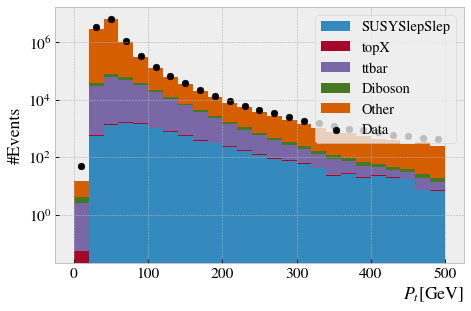

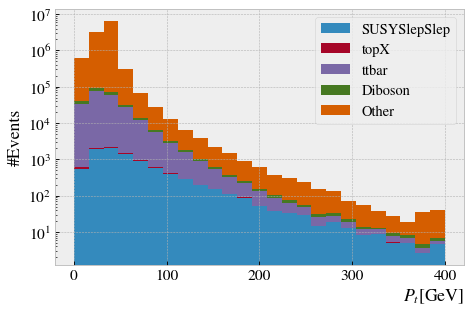

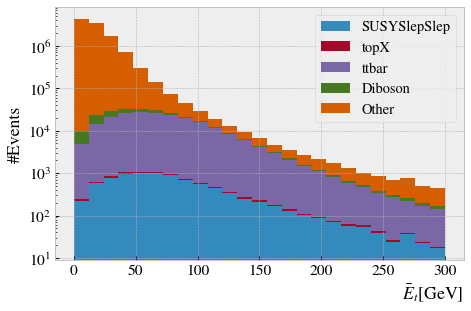

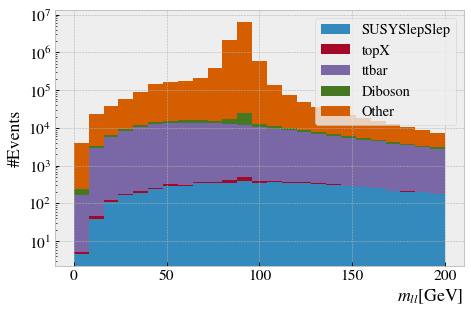

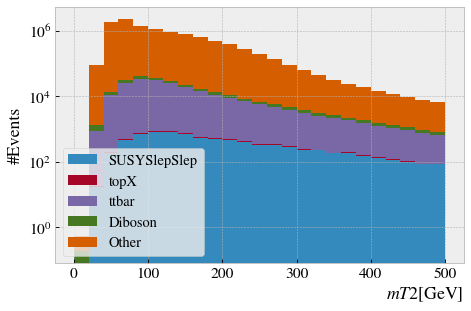

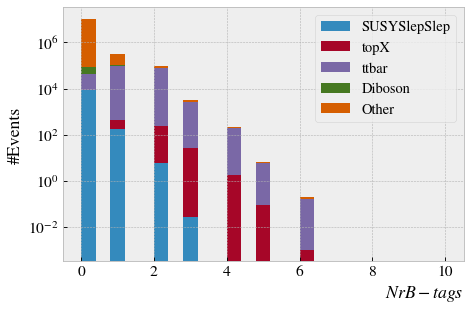

In [6]:
N, bins = np.histogram(df_data["lep1_pt"]/1000, bins = 25, range=(0,500))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

fig = plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.hist(df_pt1, weights = weights, bins = 25, range=(0,500), histtype = "barstacked", stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t1.pdf")
plt.show()

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_pt2, weights = weights, bins = 25, range=(0,400), stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t2.pdf")
plt.show()

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$\bar{E}_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mep, weights = weights, bins = 25, range=(0,300), stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/MET.pdf")
plt.show()

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m_{ll}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mll, weights = weights, bins = 25, range=(0,200), stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mll.pdf")
plt.show()

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m{T2}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mt2, weights = weights, bins = 25, range=(0,500), stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mT2.pdf")
plt.show()

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$Nr B-tags$", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_bTag, weights = weights, bins = 25, range=(0,10), stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mT2.pdf")
plt.show()

In [7]:
import pickle
xgb = pickle.load(open("XGBoost_trained", "rb"))

## Cuts signal region

In [8]:
df = df[((abs(df["mll"]-91.2*1000)>20*1000) & (df["mt2"] > 175*1000) & (df["met_et"] > 50*1000) & (df["lep1_pt"] > 80*1000) )]
df_data = df_data[((abs(df_data["mll"]-91.2*1000)>20*1000) & (df_data["mt2"] > 175*1000) & (df_data["met_et"] > 50*1000) & (df_data["lep1_pt"] > 80*1000) )]
df_category = df.category
df_weights = df.weight
df_physdescr = df.physdescr
for i in range(len(cats)):
    print(f"Nr of {cats[i]} events: {len(df[df_category == cats[i]])}")

Nr of SUSYSlepSlep events: 65741
Nr of topX events: 148012
Nr of ttbar events: 255787
Nr of Diboson events: 581888
Nr of Other events: 307379


In [9]:
df.drop(['category', 'channelNumber', 'physdescr', 'weight'],axis=1,inplace=True)
df_data.drop(['channelNumber',  'weight'],axis=1,inplace=True)

In [10]:
df_output = []
weights = []
nr_events = []
cats = ['Other' ,'Diboson' , 'ttbar', 'singleTop']
cats = ['Higgs', 'Wjets' ,'Wjetsincl', 'Zjets', 'Zjetsincl', 'topX','Diboson' , 'ttbar', 'singleTop']
cats = ['Other' ,'Diboson' , 'ttbar', 'topX']


for i in range(len(cats)):
    index = df_category == cats[i]
    X_cat = np.array(df[index])
    weights.append(df_weights[index])
    df_output.append(xgb.predict_proba(X_cat)[:,1])
    nr_events.append(len(X_cat))

sort_indx = sorted(range(len(nr_events)), key=lambda k: nr_events[k])

df_output = [df_output[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]

In [11]:
xbg_pred_data = xgb.predict_proba(np.array(df_data))[:,1]
N, bins = np.histogram(xbg_pred_data, bins = 25, range=(0,1))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
threshold = 0.651032

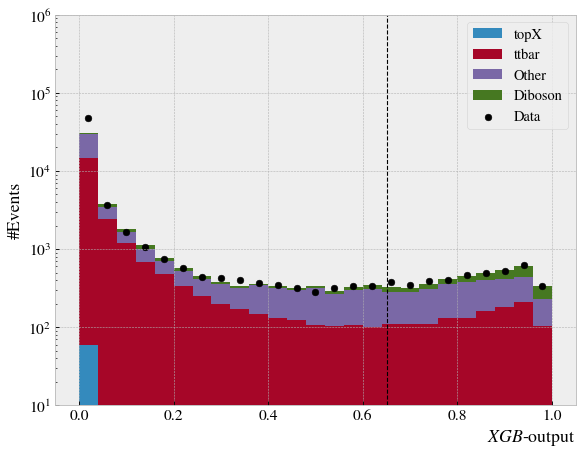

In [12]:
fig = plt.figure(figsize = (7.4, 5.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$XGB$-output", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.ylim([1e1,1e6])
plt.hist(df_output, weights = weights, bins = 25, range=(0,1), histtype = "barstacked", stacked = True, label = cats)
plt.scatter(x, N, c = "black", label = "Data")
plt.axvline(x=threshold, color="black", linestyle="--", linewidth = 1.0)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/XGB_dist.pdf")
plt.show()

In [16]:
n_obs = np.sum(np.array(xbg_pred_data>threshold))
print(len(xbg_pred_data))
bkg = 0
bkg_expt = 0
for i in range(len(df_output)):
    bkg += np.sum(weights[i][df_output[i]>threshold])
Limit = 2508
print(f"n_obs: {n_obs} --- bkg: {int(bkg)}")
print(f"n_obs - bkg = {int(n_obs-bkg)}")
print(f"Limit: 2508")

63486
n_obs: 3845 --- bkg: 3778
n_obs - bkg = 66
Limit: 2508


In [17]:
SUSY_index = df_category == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df_physdescr[SUSY_index].unique()
nr_events = []
CL_SB = []

In [18]:
for i in range(len(SUSY_masses)):
    mass_index = df_physdescr == SUSY_masses[i]
    X_mass = df[mass_index]
    weight_mass = df_weights[mass_index].array
    pred = xgb.predict_proba(X_mass)[:,1]
    nr_events.append(np.sum(weight_mass[np.array(pred>threshold)]))
    if nr_events[i] > Limit: 
        print(f"{SUSY_masses[i]}: {int(nr_events[i])} -->  Exluded")
    else:
        print(f"{SUSY_masses[i]}: {int(nr_events[i])} -->  Not exluded")

SlepSlep_direct_200p5_1p0_2L8: 277 -->  Not exluded
SlepSlep_direct_200p0_100p0_2L8: 199 -->  Not exluded
SlepSlep_direct_500p5_1p0_2L8: 7 -->  Not exluded
SlepSlep_direct_700p0_300p0_2L8: 1 -->  Not exluded
SlepSlep_direct_600p0_300p0_2L8: 2 -->  Not exluded
SlepSlep_direct_600p0_1p0_2L8: 2 -->  Not exluded
SlepSlep_direct_700p0_1p0_2L8: 1 -->  Not exluded
SlepSlep_direct_100p5_1p0_2L8: 1309 -->  Not exluded
SlepSlep_direct_500p0_300p0_2L8: 6 -->  Not exluded
SlepSlep_direct_500p0_100p0_2L8: 6 -->  Not exluded
SlepSlep_direct_300p0_200p0_2L8: 42 -->  Not exluded
SlepSlep_direct_300p5_1p0_2L8: 63 -->  Not exluded
SlepSlep_direct_100p0_50p0_2L8: 735 -->  Not exluded
SlepSlep_direct_400p0_300p0_2L8: 12 -->  Not exluded
